In [ ]:
from dash import Dash
import dash_core_components as dcc # deprecated
import dash_html_components as html # deprecated

In [ ]:
from dash import Dash, html, dcc

In [ ]:
# create an instance of Dash
app = Dash(__name__)

# layout of the dash application
app.layout = html.Div(children = html.H1('My First Dash App'))

# to run the dash application
if __name__ == '__main__':
    # by default also the port number is 8050 and by default the debug value is False.
    app.run_server(port = 8050, debug = True)

# Interactive elements in Dash app

    Dash has many interactive elements that can be added to apps for user interaction.
    
    These are provided by the Dash Core Components module(dcc).
    
    These are:
    1. Dropdown
    2. Slider
    3. RangeSlider
    4. Checklist
    5. RadioItems
    6. DatePickerSingle
    7. DatePickerRange
    8. Tabs
    9. Graphs
    
    These interactive elements are useless until they are processed in the back-end with callback functions.

### Dash dropdown component example

    The dcc.Dropdown() component has three properties:
    1. options: contains the contents of the dropdown
    2. id: the identifier for the value passed through
    3. value: the option selected

In [ ]:
from dash import Dash, html, dcc

In [ ]:
app = Dash(__name__)

dropdown = dcc.Dropdown(options=['Red', 'Blue', 'Green', 'Yellow', 'Pink'], value = '')

children = ['Pick a Color !', dropdown]

app.layout = html.Div(children=children)

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

### callback functions
    Callback functions process user inputs and update the app accordingly.
    
    1. They are triggered by a change to a property of an HTML component(input)
    2. They then change the property of another HTML component(output).
    
    callback functions are defined by using the @app.callback decorator and have atleast two arguments(output and input),
    followed by the function itself.
    
    
    @app.callback(Output(component_id, component_property), Input(component_id, component_property))

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate

In [ ]:
app = Dash(__name__)

dropdown = dcc.Dropdown(options=['Red', 'Blue', 'Green'], id='color-input')

app.layout = html.Div(children = [dropdown, html.Div(id = 'color-output')])


@app.callback(Output('color-output', 'children'), Input('color-input', 'value'))
def update_div(color :str) -> str:
    if color is None:
        raise PreventUpdate
    return f"color selected : {color}"

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

# Assignment 1: Simple Dash App

    Create a dash application with the following front-end components
    1. A text title 'Select a State to Analyze'.
    2. A dropdown menu that contains the options 'California', 'Oregon' and 'Washington'.
    3. Text 'State Selected: X' where X is the state selected in the dropdown menu.
    
    You will need to build a callback function that takes the selected state and returns output text based on the value selected in the dropdown menu.

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output

In [ ]:
app = Dash(__name__)

options = ['California', 'Oregon', 'Washington']
dropdown = dcc.Dropdown(id = 'state-input', options = options)

app.layout = html.Div(children = [html.H3('Pick a state'), dropdown, html.Div(id = 'state-output')])


@app.callback(
    Output('state-output', 'children'),
    Input('state-input', 'value')
)
def update_output_div(state: str) -> str:
    if state is None:
        raise PreventUpdate
    return f'The selected state is {state}'

if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

# Adding plotly visuals to Dash applications

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px

In [ ]:
iris = pd.read_csv('datasets/iris.csv')

In [ ]:
iris

In [ ]:
species = iris['class'].value_counts().index.tolist()
species

In [ ]:
app = Dash(__name__)

app.layout = html.Div(children = ['Pick a specie', 
                                  dcc.Dropdown(id='specie-input', options=species),
                                  dcc.Graph(id='specie-output')
                                 ])

@app.callback(Output('specie-output', 'figure'), Input('specie-input', 'value'))
def update_output_graph(specie : str):
    
    if specie is None:
        raise PreventUpdate
    
    df = iris[iris['class'] == specie]
    
    trace = go.Scatter(x= df['sepal_length'].values, y=df['petal_length'].values, mode='markers')
    
    data = [trace]
    
    layout = go.Layout(title='sepal_length vs petal_length', xaxis={'title':'sepal_length'}, yaxis=dict(title='petal_length'))
    
    return go.Figure(data=data, layout=layout)
    
    
if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

# adding HTML components 

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output

app = Dash(__name__)

dropdown = dcc.Dropdown(id = 'color-input', options = ['red', 'blue', 'green', 'yellow', 'pink'])

app.layout = html.Div(children = [dropdown, html.H3('This is inside an HTML component', id ='color-output')])


@app.callback(Output('color-output', 'style'), Input('color-input', 'value'))
def update_div_text_color(color : str) -> dict:
    return dict(color = color)
    

if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

# core components

In [ ]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

In [ ]:
app = Dash(__name__)

options = [dict(label = 'San Francisco', value = 'SF'), dict(label = 'New York City', value = 'NYC')]

dropdown = dcc.Dropdown(options = options, value = 'SF')

slider = dcc.Slider(min = -10, max = 10, step=1, value = 0, marks = {i:chr(75+i) for i in range(-10, 11)})

app.layout = html.Div(children = [html.H3('Dropdown'), dropdown, html.H3('Slider'), slider])

if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

# Input bar in Dash dashboard with callback

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate

In [ ]:
app = Dash(__name__)

app.layout = html.Div(children = [dcc.Input(id = 'name-input', type = 'text'), html.H3(id = 'name-output')])


@app.callback(Output('name-output', 'children'), Input('name-input', 'value'))
def update_name(name : str) -> str:
    if name is None:
        raise PreventUpdate
    elif name == '':
        return f''
    else:
        return f"Your name is {name}"

if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

# passing multiple inputs

        when we have multiple inputs that control a single output parameter, then we use list while writing the decorator
        @app.callback.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate

In [ ]:
app = Dash(__name__)

app.layout = html.Div(children = ['Enter the name', dcc.Input(id = 'name-input', type = 'text'),
                                  'Enter the age', dcc.Input(id = 'age-input', type = 'text'),
                                  html.H3(id = 'output')
                                 ])

@app.callback(Output('output', 'children'), [Input('name-input', 'value'), Input('age-input', 'value')])
def update_output_div(name : str, age : str) -> str:
    if name is None:
        raise PreventUpdate
    if age is None:
        raise PreventUpdate
    
    if age == '' or name == '':
        return f''
    
    age = int(age)
    
    return f'My name is {name} and my age is {age}'

if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

# multiple inputs assignment

    Make a dash application that will plot the equation of a line with slope [m] and y-intercept [c]. These parameters will
    be given by the user.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from dash import Dash, html, dcc
from dash.dependencies import Input, Output 
from dash.exceptions import PreventUpdate

In [ ]:
app = Dash(__name__)

app.layout = html.Div(children = ['m', 
                                  dcc.Input(id = 'm', type = 'text'), 
                                  ' c',
                                  dcc.Input(id = 'c', type = 'text'),
                                  dcc.Graph(id = 'line')
                                 ])

@app.callback(
    Output('line', 'figure'), 
    [Input('m', 'value'), Input('c', 'value')]
)
def line_plotter(m :str, c : str):
    if (m is None) or (c is None):
        raise PreventUpdate
        
    if m == '' or c == '':
        return go.Figure(data = [], 
                         layout = go.Layout())
    
    m = int(m)
    c = int(c)
    
    # generating x values
    x = np.linspace(-10, 10, 21)
    y = (m * x) + c
    
    trace = go.Scatter(x = x, y = y, 
                       mode = 'lines+markers', 
                       name = f'line with slope {m} and y-intercept {c}')
    
    data = [trace]
    
    layout = go.Layout(title = f'A line with slope {m} and y-intercept {c}', 
                       xaxis = dict(title = 'x'), 
                       yaxis = dict(title = 'y'))

    fig = go.Figure(data = data, layout = layout)
    
    return fig


if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

# Multiple outputs

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate

In [ ]:
app = Dash(__name__)

app.layout = html.Div(children = [
                                    html.H3('Choose a number'),
                                    dcc.RadioItems(options = [
                                                                {'label':f'{i}', 'value':i} 
                                                                for i in [1,2,3]
                                                             ], 
                                                   id = 'number'), 
                                    html.Div(id = 'output-number'),
                                    html.Hr(),
                                    html.H3('Choose a color'), 
                                    dcc.RadioItems(options = [
                                                                {'label':color, 'value': color} 
                                                                for color in ['red', 'blue', 'green']
                                                             ], 
                                                   id = 'color'),
                                    html.Div(id = 'output-color')
                                 ]
                     )

@app.callback(Output('output-number', 'children'), Input('number', 'value'))
def update_number_div(number : str) -> str:
    if number is None:
        raise PreventUpdate
    return f'You chose {number}'

@app.callback(Output('output-color', 'children'), Input('color', 'value'))
def update_color_div(color : str) -> str:
    if color is None:
        raise PreventUpdate
    return f'You chose {color}'

if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

# wheels app (multiple output example)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from dash import Dash, html, dcc
from dash.dependencies import Input, Output 
from dash.exceptions import PreventUpdate
import base64

In [ ]:
wheels = pd.read_csv('datasets/wheels.csv')
wheels

In [ ]:
app = Dash(__name__)

app.layout = html.Div([
                            dcc.RadioItems(
                                id='wheels',
                                options=[{'label': i, 'value': i} for i in wheels['wheels'].unique()],
                                value=1
                            ),
                            html.Div(id='wheels-output'),
                            html.Hr(),  # add a horizontal rule
                            dcc.RadioItems(
                                id='colors',
                                options=[{'label': i, 'value': i} for i in wheels['color'].unique()],
                                value='blue'
                            ),
                            html.Div(id='colors-output'),
                            html.Img(id='display-image', src='children', height=300)
                        ], 
                        style={'fontFamily':'helvetica', 'fontSize':18}
                    )

def encode_image(image_file):
    encoded = base64.b64encode(open(image_file, 'rb').read())
    return f"data:image/png;base64,{encoded.decode()}"


@app.callback(Output('colors-output', 'children'), Input('colors', 'value'))
def callback_b(colors_value):
    return f"You've selected {colors_value}"

@app.callback(Output('wheels-output', 'children'), Input('wheels', 'value'))
def callback_a(wheels_value):
    return f"You've selected {wheels_value}"

@app.callback(Output('display-image', 'src'), [Input('wheels', 'value'), Input('colors', 'value')])
def callback_image(wheel, color):
    path = 'images/'
    
    # Now try to get the image name
    mask = (wheels['wheels'] == wheel) & (wheels['color'] == color)
    
    # get the row corresponding to the desired image
    row = wheels[mask]
    
    # get the image name
    image_name = row['image'].values[0]
    
    # complete image path
    image_file = path + image_name
    
    return encode_image(image_file)


if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

# Interactive Components Exercise

    Create a dashboard that takes in two or more input values and returns their product as the output.
    This must be performed using RangeSlider

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate

In [20]:
app = Dash(__name__)

app.layout = html.Div(children = ['Select the numbers', 
                                  dcc.RangeSlider(id = 'range-slider',
                                                  max = 10, 
                                                  min = -10, 
                                                  step = 1, 
                                                  marks = {i : str(i) for i in range(-10, 11)},  # list of dictionaries
                                                  value=[-1, 1]
                                                  ),
                                  html.Div(id = 'output')
                                 ])


@app.callback(Output('output', 'children'), Input('range-slider', 'value'))
def update_prod_div(value : list):
    return f'The product is {value[0] * value[1]}'

if __name__ == '__main__':
    app.run_server(port=8050, debug=True)

In [26]:
import PIL

In [27]:
from PIL import Image

In [29]:
pic = np.asarray(Image.open('Images/bluetricycle.jpg'))

In [31]:
pic.shape

(425, 640, 3)

In [32]:
red_pic = pic[:, :, 0]

In [33]:
green_pic = pic[:, :, 1]
blue_pic = pic[:, :, 2]

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

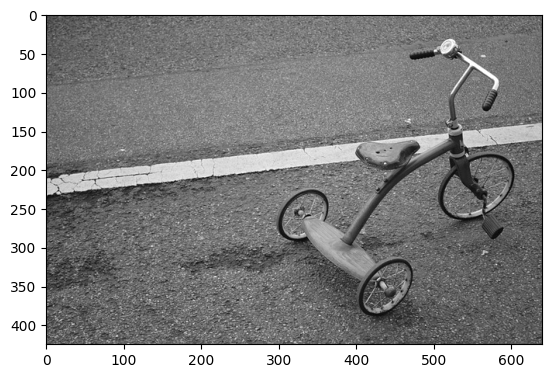

In [36]:
plt.imshow(green_pic, cmap = 'gray')

In [39]:
pic[:, :, 1] = 0


ValueError: assignment destination is read-only

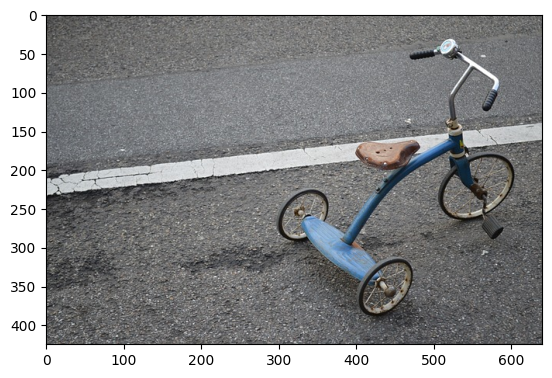

In [38]:
plt.imshow(pic)